# Import Libraries:


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats




# Load the Dataset


In [2]:
df = pd.read_csv('AusApparalSales4thQrt2020.csv')
df.head()


,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


# Data Wrangling

In [3]:
# Missing Values
df.isna().sum()
df.notna().sum()


Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64

In [4]:
# Handle Missing Data
df.fillna(df.mean(numeric_only=True), inplace=True)



In [8]:
# Normalize Sales and Units
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Sales', 'Unit']] = scaler.fit_transform(df[['Sales', 'Unit']])






# Descriptive Statistics




In [10]:

print("Sales Statistics:")
print(df['Sales'].describe())

print("Units Statistics:")
print(df['Unit'].describe())



Sales Statistics:
count    7560.000000
mean        0.254054
std         0.204784
min         0.000000
25%         0.095238
50%         0.190476
75%         0.380952
max         1.000000
Name: Sales, dtype: float64
Units Statistics:
count    7560.000000
mean        0.254054
std         0.204784
min         0.000000
25%         0.095238
50%         0.190476
75%         0.380952
max         1.000000
Name: Unit, dtype: float64


# Identify Top and Bottom Groups

In [11]:
group_sales = df.groupby('Group')['Sales'].sum().reset_index()
highest_group = group_sales.loc[group_sales['Sales'].idxmax()]
lowest_group = group_sales.loc[group_sales['Sales'].idxmin()]
print(f"Highest Sales Group: {highest_group}")
print(f"Lowest Sales Group: {lowest_group}")


Highest Sales Group: Group           Men
Sales    484.444444
Name: 1, dtype: object
Lowest Sales Group: Group       Seniors
Sales    473.571429
Name: 2, dtype: object


# Time-Based Reports

In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df['Week'] = df['Date'].dt.isocalendar().week
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

weekly_report = df.groupby('Week')['Sales'].sum()
monthly_report = df.groupby('Month')['Sales'].sum()
quarterly_report = df.groupby('Quarter')['Sales'].sum()




# Data Visualization

#State-wise Sales by Group


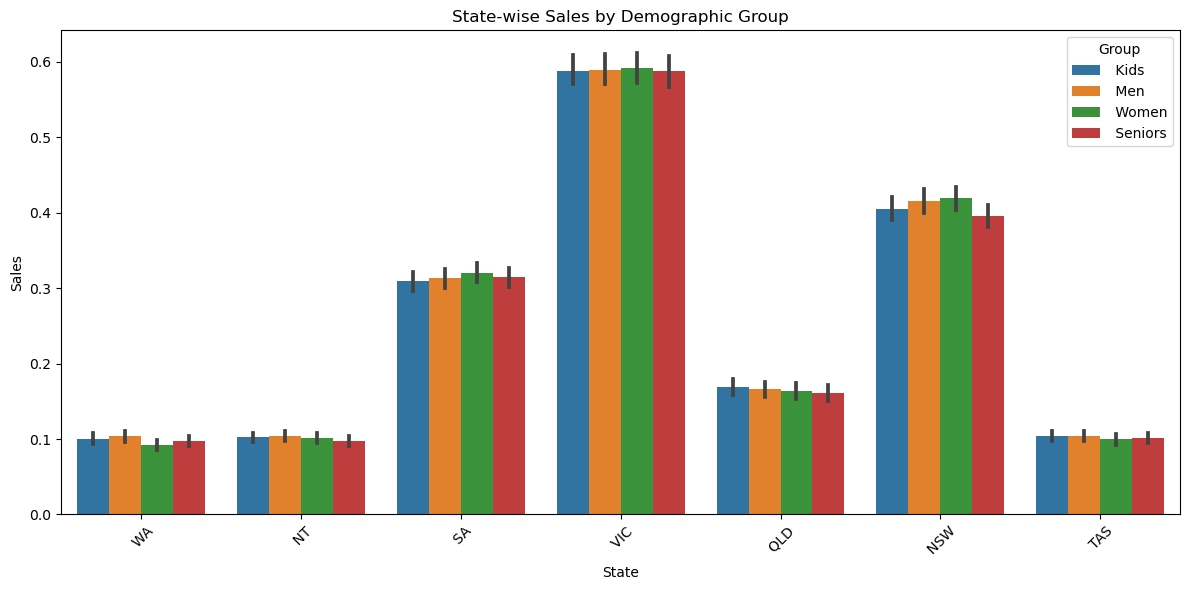

In [ ]:

plt.figure(figsize=(12,6))
sns.barplot(data=df, x='State', y='Sales', hue='Group')
plt.title('State-wise Sales by Demographic Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




Group-wise Sales Distribution:

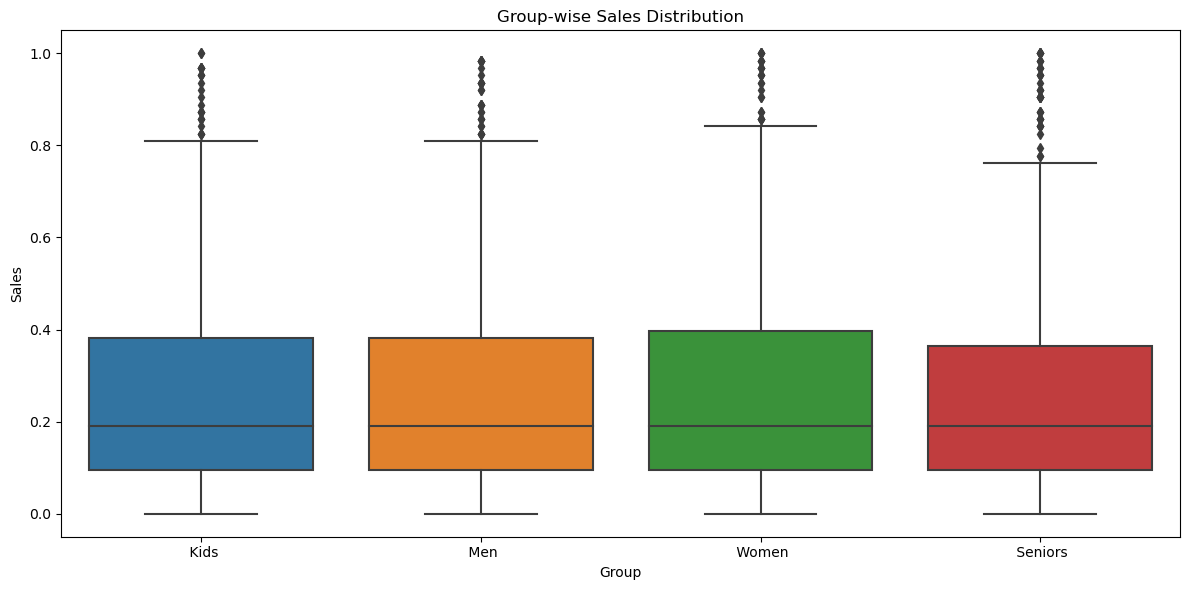

In [ ]:


plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Group', y='Sales')
plt.title('Group-wise Sales Distribution')
plt.tight_layout()
plt.show()


Time-of-Day Analysis:

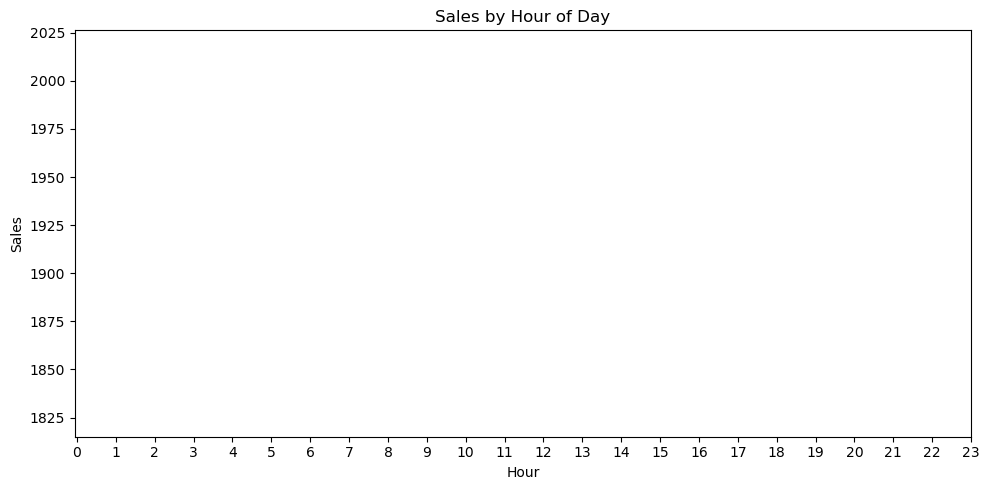

In [ ]:


df['Hour'] = df['Date'].dt.hour
hourly_sales = df.groupby('Hour')['Sales'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=hourly_sales, x='Hour', y='Sales')
plt.title('Sales by Hour of Day')
plt.xticks(range(0,24))
plt.tight_layout()
plt.show()





Daily, Weekly, Monthly, Quarterly Charts:


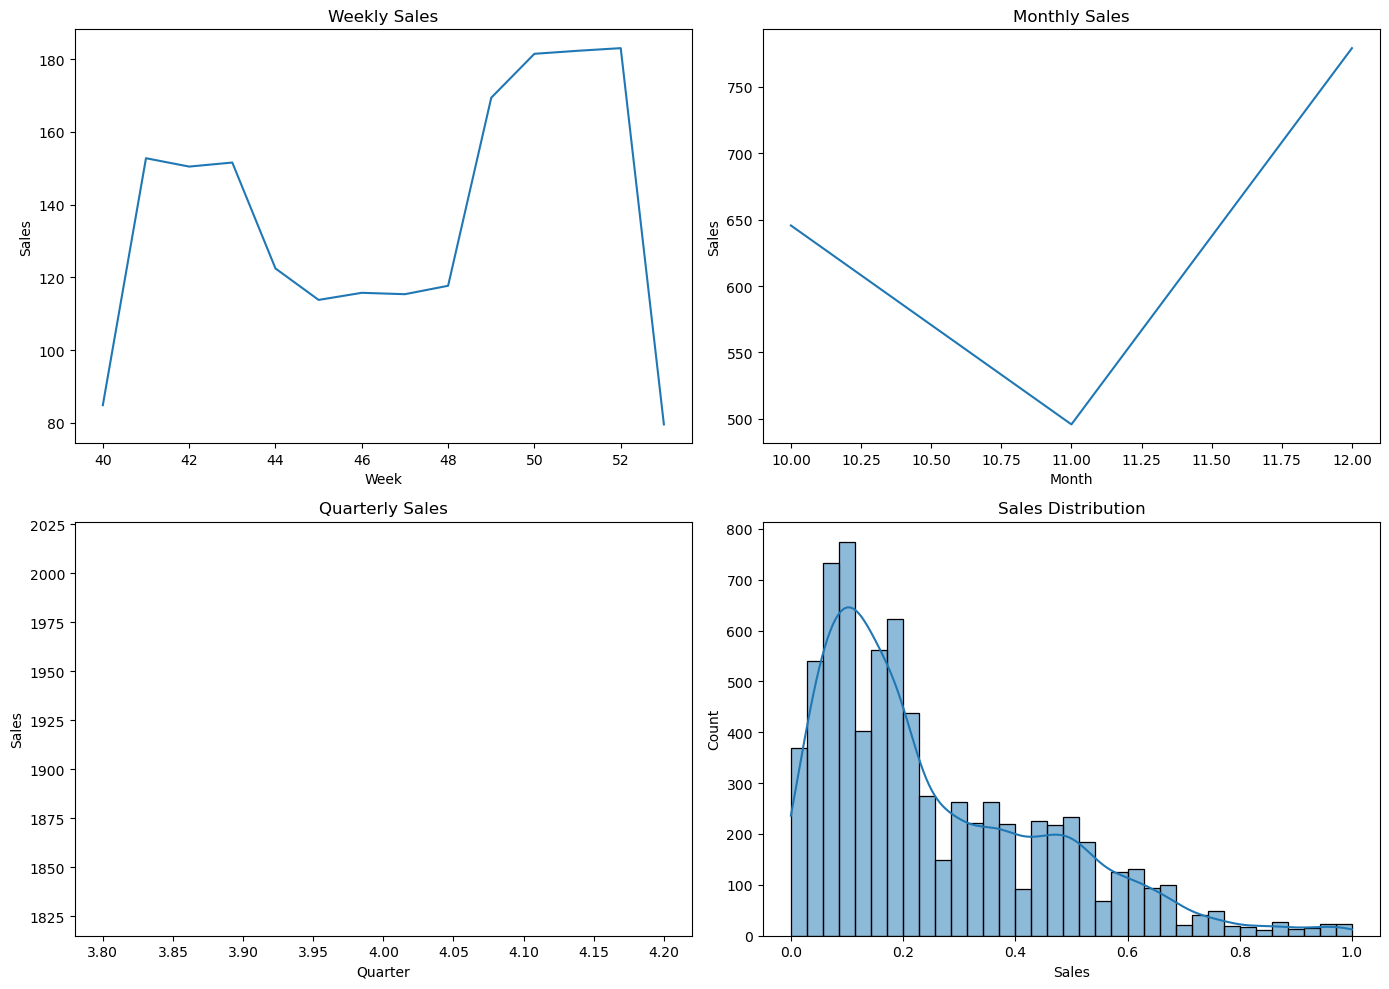

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(14,10))

# Weekly
weekly_df = weekly_report.reset_index()
weekly_df.columns = ['Week', 'Sales']
sns.lineplot(data=weekly_df, x='Week', y='Sales', ax=axs[0,0], errorbar=None)
axs[0,0].set_title('Weekly Sales')

# Monthly
monthly_df = monthly_report.reset_index()
monthly_df.columns = ['Month', 'Sales']
sns.lineplot(data=monthly_df, x='Month', y='Sales', ax=axs[0,1], errorbar=None)
axs[0,1].set_title('Monthly Sales')

# Quarterly
quarterly_df = quarterly_report.reset_index()
quarterly_df.columns = ['Quarter', 'Sales']
sns.lineplot(data=quarterly_df, x='Quarter', y='Sales', ax=axs[1,0], errorbar=None)
axs[1,0].set_title('Quarterly Sales')

# Distribution plot
sns.histplot(df['Sales'], kde=True, ax=axs[1,1])
axs[1,1].set_title('Sales Distribution')

plt.tight_layout()
plt.show()
